In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd

# Paste the path you copied in the previous step
file_path = '/content/drive/MyDrive/US_Accidents_March23.csv'

try:
    # Load the data
    df = pd.read_csv(file_path, nrows=10000)
    print(df.head())

    # Display the first 5 rows to confirm it worked
    print("\n--- First 5 Rows of the Dataset ---")
    print(df.head())

    # Display info to see the columns and data types
    print("\n--- Data Info ---")
    df_sample.info()

except FileNotFoundError:
    print(f"❌ Error: File not found at the path '{file_path}'. Please double-check the path you copied.")

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

***Analyze the Target Variable (Severity)***

--- Severity Distribution ---
Severity
1       6
2    6047
3    3941
4       6
Name: count, dtype: int64


/tmp/ipython-input-1415757674.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=df, palette='viridis')


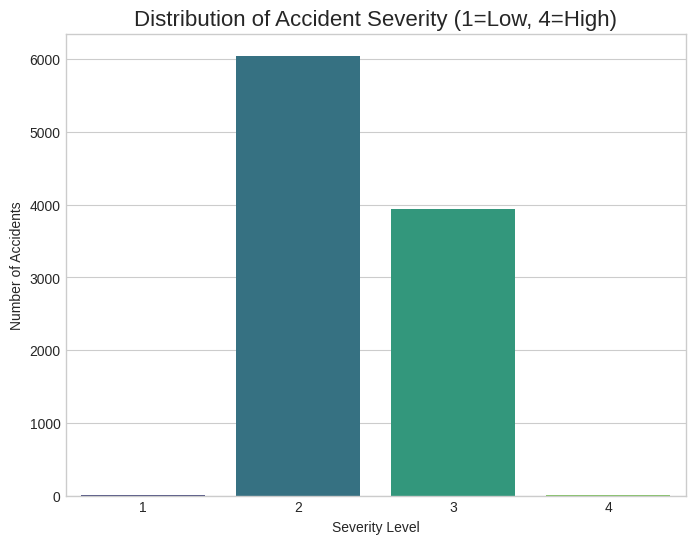

In [10]:
# Check the distribution of the 'Severity' column
print("--- Severity Distribution ---")
severity_counts = df['Severity'].value_counts().sort_index()
print(severity_counts)

# Visualize the Severity distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Severity', data=df, palette='viridis')
plt.title('Distribution of Accident Severity (1=Low, 4=High)', fontsize=16)
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.show()

***Explore Key Features***

/tmp/ipython-input-2483020691.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df_sample, palette='magma')


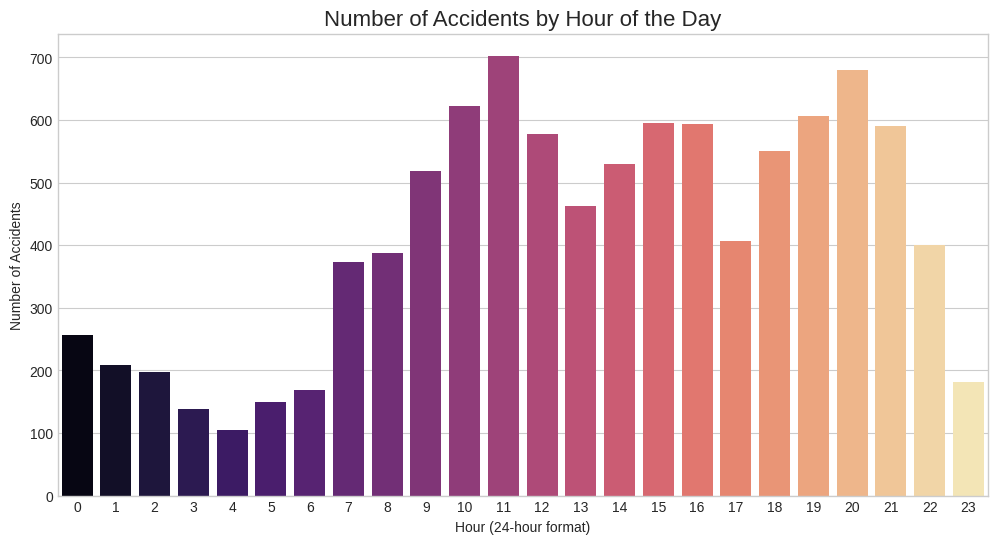

/tmp/ipython-input-2483020691.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df_sample, palette='plasma')


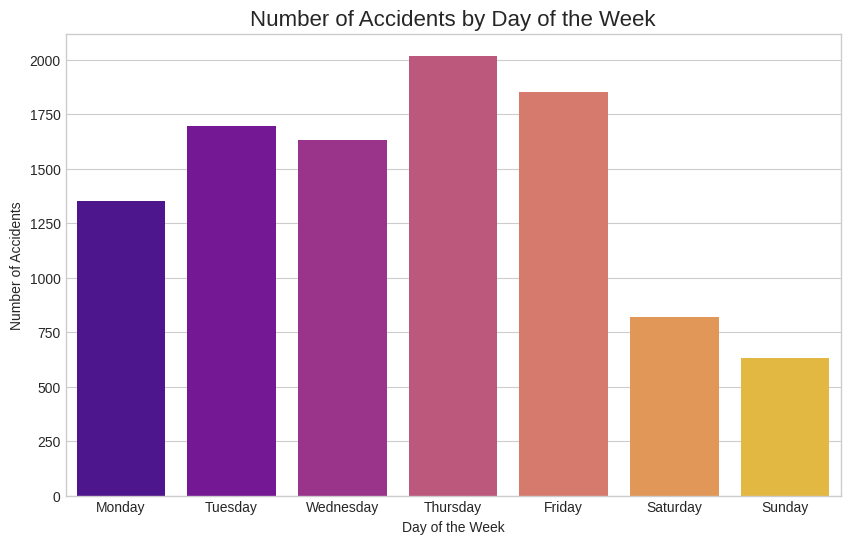

In [11]:
# Convert Start_Time to a proper datetime format for analysis
df_sample['Start_Time'] = pd.to_datetime(df_sample['Start_Time'])

# Extract the hour of the day
df_sample['Hour'] = df_sample['Start_Time'].dt.hour

# Visualize accidents by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df_sample, palette='magma')
plt.title('Number of Accidents by Hour of the Day', fontsize=16)
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Number of Accidents')
plt.show()

# Extract the day of the week (Monday=0, Sunday=6)
df_sample['DayOfWeek'] = df_sample['Start_Time'].dt.dayofweek

# Visualize accidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df_sample, palette='plasma')
plt.title('Number of Accidents by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

--- Top 15 States with Most Accidents ---
State
CA    9272
OH     726
WV       2
Name: count, dtype: int64


/tmp/ipython-input-2676280238.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_states.index, x=top_states.values, palette='cubehelix')


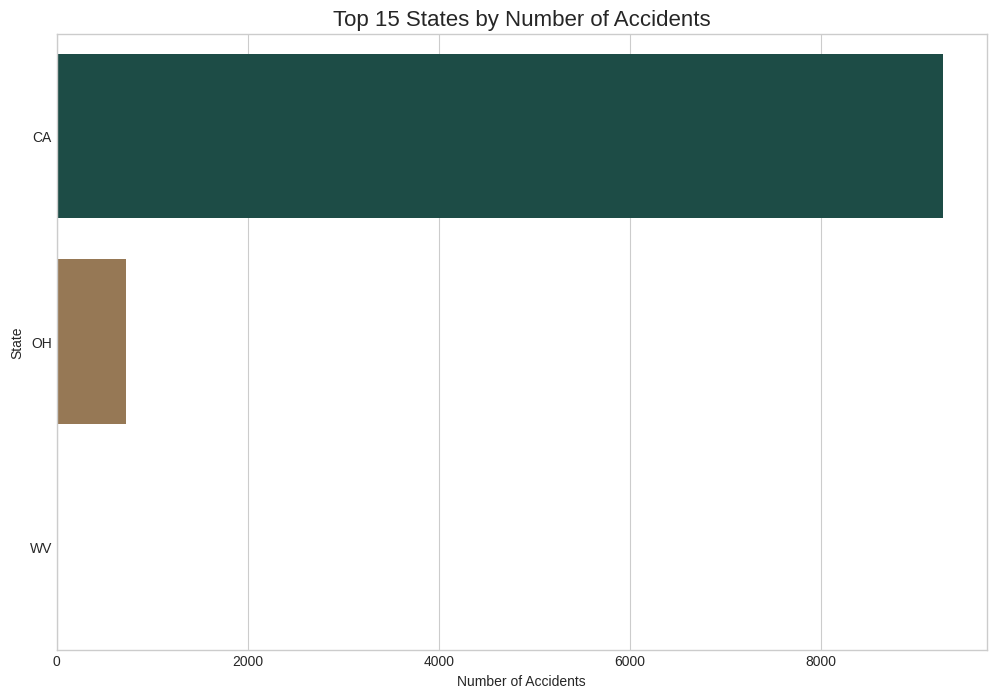

In [12]:
# Get the top 15 states with the most accidents
top_states = df['State'].value_counts().nlargest(15)

print("--- Top 15 States with Most Accidents ---")
print(top_states)

# Visualize the top 15 states
plt.figure(figsize=(12, 8))
sns.barplot(y=top_states.index, x=top_states.values, palette='cubehelix')
plt.title('Top 15 States by Number of Accidents', fontsize=16)
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.show()


--- Top 15 Weather Conditions in Accidents ---
Weather_Condition
Clear                     5495
Overcast                  1403
Partly Cloudy              766
Mostly Cloudy              700
Light Rain                 677
Scattered Clouds           447
Haze                       134
Rain                       112
Light Snow                 110
Heavy Rain                  18
Fog                         15
Mist                        11
Light Freezing Drizzle      10
Snow                         7
Shallow Fog                  4
Name: count, dtype: int64


/tmp/ipython-input-2563457532.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_weather.index, x=top_weather.values, palette='mako')


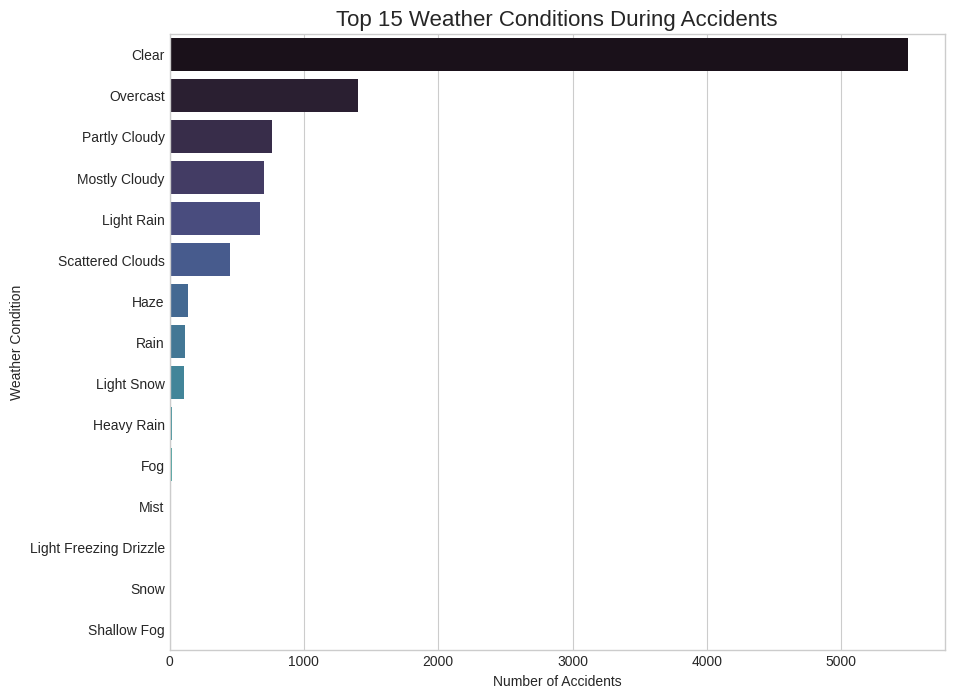

In [13]:
# Get the top 15 most common weather conditions
top_weather = df_sample['Weather_Condition'].value_counts().nlargest(15)

print("\n--- Top 15 Weather Conditions in Accidents ---")
print(top_weather)

# Visualize the top 15 weather conditions
plt.figure(figsize=(10, 8))
sns.barplot(y=top_weather.index, x=top_weather.values, palette='mako')
plt.title('Top 15 Weather Conditions During Accidents', fontsize=16)
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()